#### TALLER 04 - SPLINES CUBICOS
#### DANNY CAIZA 
#### GRUPO: GR1

1. Complete el código del siguiente repositorio:

In [12]:
import sympy as sym
from IPython.display import display

# ###################################################################
def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  


    alpha = [0] * (n + 1)
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    
    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l.append(2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1])
        u.append(h[i] / l[i])
        z.append((alpha[i] - h[i - 1] * z[i - 1]) / l[i])   

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []

    
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]   # ← COMPLETADO

        print(j, a, b, c[j], d)

        S = a + b*(x - xs[j]) + c[j]*(x - xs[j])**2 + d*(x - xs[j])**3   

        splines.append(S)

    splines.reverse()
    return splines

xs = [0, 1, 2]
ys = [-5, -4, 3]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]


1 -4 4.0 4.5 -1.5
0 -5 -0.5 0.0 1.5


1.5*x**3 - 0.5*x - 5

4.0*x - 1.5*(x - 1)**3 + 4.5*(x - 1)**2 - 8.0

______


1.5*x**3 - 0.5*x - 5

-1.5*x**3 + 9.0*x**2 - 9.5*x - 2.0

2. Compruebe gráficamente la solución de los siguientes ejercicios:

**a) (0,1),(1,5),(2,3)**

Splines obtenidos:


-1.5*x**3 + 5.5*x + 1

1.5*x**3 - 9.0*x**2 + 14.5*x - 2.0

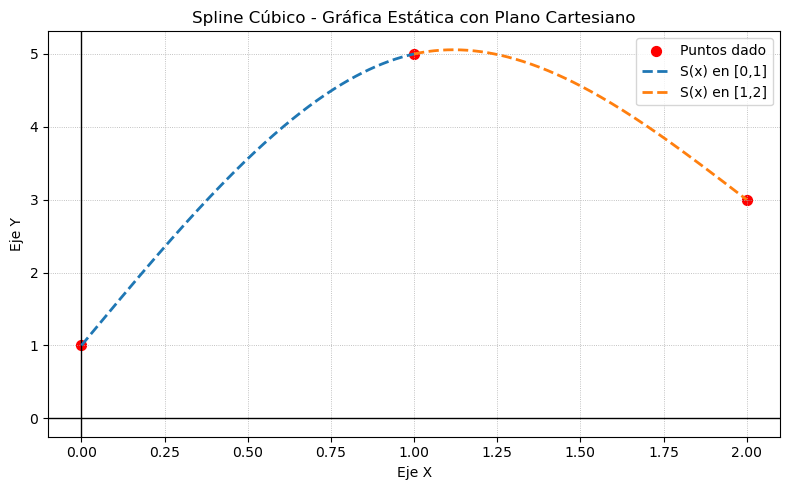

In [ ]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

def cubic_spline(xs: list[float], ys: list[float]):
    points = sorted(zip(xs, ys), key=lambda x: x[0])

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1
    h = [xs[i + 1] - xs[i] for i in range(n)]

    alpha = [0] * (n + 1)
    for i in range(1, n):
        alpha[i] = 3/h[i] * (ys[i+1] - ys[i]) - 3/h[i-1] * (ys[i] - ys[i-1])

    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l.append(2*(xs[i+1] - xs[i-1]) - h[i-1]*u[i-1])
        u.append(h[i] / l[i])
        z.append((alpha[i] - h[i-1]*z[i-1]) / l[i])

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    coeffs = []

    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j+1]
        b = (ys[j+1] - ys[j]) / h[j] - h[j]*(c[j+1] + 2*c[j]) / 3
        d = (c[j+1] - c[j]) / (3*h[j])
        a = ys[j]

        S = a + b*(x - xs[j]) + c[j]*(x - xs[j])**2 + d*(x - xs[j])**3
        splines.append(S)
        coeffs.append((xs[j], xs[j+1], sym.lambdify(x, S, 'numpy')))

    splines.reverse()
    coeffs.reverse()
    return splines, coeffs


xs = [0, 1, 2]
ys = [1, 5, 3]

splines, coeffs = cubic_spline(xs, ys)

print("Splines obtenidos:")
for s in splines:
    display(s.expand())


plt.figure(figsize=(8,5))

plt.axhline(0, color="black", linewidth=1)
plt.axvline(0, color="black", linewidth=1)

plt.scatter(xs, ys, color="red", s=50, label="Puntos dado")

for (x0, x1, f) in coeffs:
    xr = np.linspace(x0, x1, 200)
    yr = f(xr)
    plt.plot(xr, yr, linestyle="--", linewidth=2, label=f"S(x) en [{x0},{x1}]")

plt.grid(True, linestyle=":", linewidth=0.6)

plt.title("Spline Cúbico - Gráfica Estática con Plano Cartesiano")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.legend()
plt.tight_layout()

plt.show()


**b) (0,−5),(1,−4),(2,3)**

Splines obtenidos:


1.5*x**3 - 0.5*x - 5

-1.5*x**3 + 9.0*x**2 - 9.5*x - 2.0

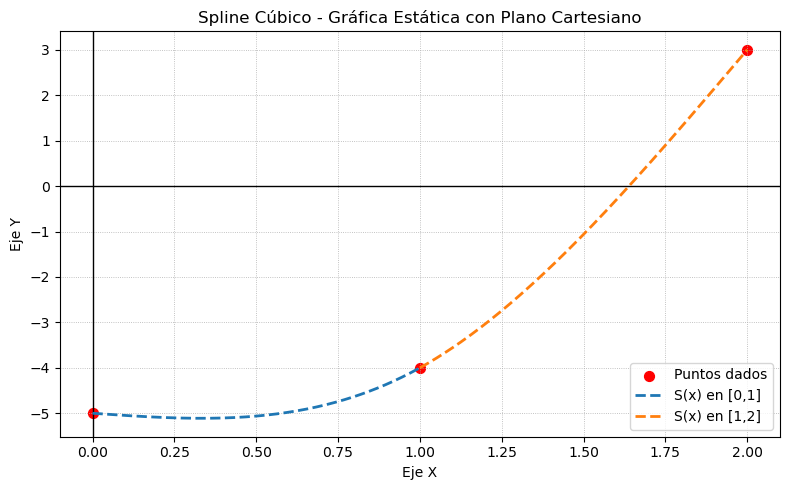

In [5]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display


def cubic_spline(xs: list[float], ys: list[float]):
    points = sorted(zip(xs, ys), key=lambda x: x[0])

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1
    h = [xs[i + 1] - xs[i] for i in range(n)]

    alpha = [0] * (n + 1)
    for i in range(1, n):
        alpha[i] = 3/h[i] * (ys[i+1] - ys[i]) - 3/h[i-1] * (ys[i] - ys[i-1])

    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l.append(2*(xs[i+1] - xs[i-1]) - h[i-1]*u[i-1])
        u.append(h[i] / l[i])
        z.append((alpha[i] - h[i-1]*z[i-1]) / l[i])

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    coeffs = []

    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j+1]
        b = (ys[j+1] - ys[j]) / h[j] - h[j]*(c[j+1] + 2*c[j]) / 3
        d = (c[j+1] - c[j]) / (3*h[j])
        a = ys[j]

        S = a + b*(x - xs[j]) + c[j]*(x - xs[j])**2 + d*(x - xs[j])**3
        splines.append(S)
        coeffs.append((xs[j], xs[j+1], sym.lambdify(x, S, 'numpy')))

    splines.reverse()
    coeffs.reverse()
    return splines, coeffs

xs = [0, 1, 2]
ys = [-5, -4, 3]

splines, coeffs = cubic_spline(xs, ys)

print("Splines obtenidos:")
for s in splines:
    display(s.expand())


plt.figure(figsize=(8,5))

plt.axhline(0, color="black", linewidth=1)
plt.axvline(0, color="black", linewidth=1)

plt.scatter(xs, ys, color="red", s=50, label="Puntos dados")

for (x0, x1, f) in coeffs:
    xr = np.linspace(x0, x1, 200)
    yr = f(xr)
    plt.plot(xr, yr, linestyle="--", linewidth=2, label=f"S(x) en [{x0},{x1}]")

plt.grid(True, linestyle=":", linewidth=0.6)

plt.title("Spline Cúbico - Gráfica Estática con Plano Cartesiano")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.legend()
plt.tight_layout()

plt.show()


**c) (0,−1),(1,1),(2,5),(3,2)**

Splines obtenidos:


1.0*x**3 + 1.0*x - 1

-3.0*x**3 + 12.0*x**2 - 11.0*x + 3.0

2.0*x**3 - 18.0*x**2 + 49.0*x - 37.0

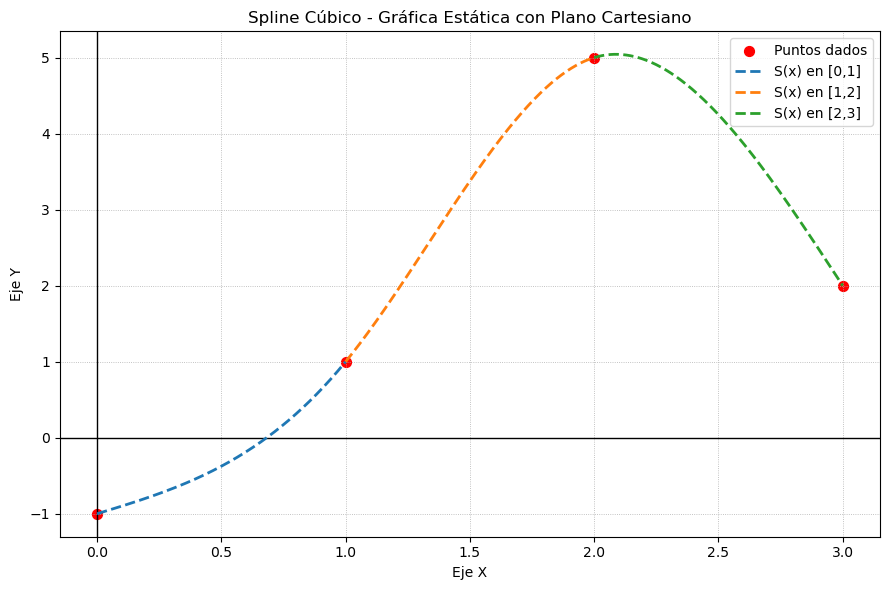

In [6]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

def cubic_spline(xs: list[float], ys: list[float]):
    points = sorted(zip(xs, ys), key=lambda x: x[0])

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1
    h = [xs[i + 1] - xs[i] for i in range(n)]

    alpha = [0] * (n + 1)
    for i in range(1, n):
        alpha[i] = 3/h[i] * (ys[i+1] - ys[i]) - 3/h[i-1] * (ys[i] - ys[i-1])

    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l.append(2*(xs[i+1] - xs[i-1]) - h[i-1]*u[i-1])
        u.append(h[i] / l[i])
        z.append((alpha[i] - h[i-1]*z[i-1]) / l[i])

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    coeffs = []

    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j+1]
        b = (ys[j+1] - ys[j]) / h[j] - h[j]*(c[j+1] + 2*c[j]) / 3
        d = (c[j+1] - c[j]) / (3*h[j])
        a = ys[j]

        S = a + b*(x - xs[j]) + c[j]*(x - xs[j])**2 + d*(x - xs[j])**3
        splines.append(S)
        coeffs.append((xs[j], xs[j+1], sym.lambdify(x, S, 'numpy')))

    splines.reverse()
    coeffs.reverse()
    return splines, coeffs

xs = [0, 1, 2, 3]
ys = [-1, 1, 5, 2]

splines, coeffs = cubic_spline(xs, ys)

print("Splines obtenidos:")
for s in splines:
    display(s.expand())


plt.figure(figsize=(9,6))

plt.axhline(0, color="black", linewidth=1)
plt.axvline(0, color="black", linewidth=1)

plt.scatter(xs, ys, color="red", s=50, label="Puntos dados")

for (x0, x1, f) in coeffs:
    xr = np.linspace(x0, x1, 250)
    yr = f(xr)
    plt.plot(xr, yr, linestyle="--", linewidth=2, label=f"S(x) en [{x0},{x1}]")

plt.grid(True, linestyle=":", linewidth=0.6)

plt.title("Spline Cúbico - Gráfica Estática con Plano Cartesiano")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.legend()
plt.tight_layout()

plt.show()


**3. Realice una animación al mover el punto  x1,y1**

a)**a) (0,1),(1,5),(2,3)**

In [1]:
import sympy as sym
import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display

def cubic_spline(xs: list[float], ys: list[float]):
    points = sorted(zip(xs, ys), key=lambda x: x[0])

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1
    h = [xs[i + 1] - xs[i] for i in range(n)]

    alpha = [0] * (n + 1)
    for i in range(1, n):
        alpha[i] = 3/h[i] * (ys[i+1] - ys[i]) - 3/h[i-1] * (ys[i] - ys[i-1])

    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l.append(2*(xs[i+1] - xs[i-1]) - h[i-1]*u[i-1])
        u.append(h[i] / l[i])
        z.append((alpha[i] - h[i-1]*z[i-1]) / l[i])

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    coeffs = []

    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j+1]
        b = (ys[j+1] - ys[j]) / h[j] - h[j]*(c[j+1] + 2*c[j]) / 3
        d = (c[j+1] - c[j]) / (3*h[j])
        a = ys[j]

        S = a + b*(x - xs[j]) + c[j]*(x - xs[j])**2 + d*(x - xs[j])**3
        splines.append(S)
        coeffs.append((xs[j], xs[j+1], sym.lambdify(x, S, 'numpy')))

    splines.reverse()
    coeffs.reverse()
    return splines, coeffs


xs = [0, 1, 2]
ys = [1, 5, 3]

splines, coeffs = cubic_spline(xs, ys)

def compute_curve(xs, ys):
    splines, coeffs = cubic_spline(xs, ys)

    xr0 = np.linspace(xs[0], xs[1], 200)
    yr0 = coeffs[0][2](xr0)

    xr1 = np.linspace(xs[1], xs[2], 200)
    yr1 = coeffs[1][2](xr1)

    return xr0, yr0, xr1, yr1


xr0, yr0, xr1, yr1 = compute_curve(xs, ys)

fig = go.FigureWidget()

trace0 = fig.add_scatter(x=xr0, y=yr0, mode="lines", name="Spline 1")
trace1 = fig.add_scatter(x=xr1, y=yr1, mode="lines", name="Spline 2")
points = fig.add_scatter(x=xs, y=ys, mode="markers", marker=dict(size=12, color="red"))

fig.update_layout(
    title="Spline Cúbico Interactivo (Mover punto central con slider)",
    xaxis=dict(range=[-1, 3]),
    yaxis=dict(range=[-1, 7]),
    width=800,
    height=500
)
slider_x = widgets.FloatSlider(
    value=1,
    min=0,
    max=2,
    step=0.01,
    description="X punto medio"
)

slider_y = widgets.FloatSlider(
    value=5,
    min=-1,
    max=7,
    step=0.01,
    description="Y punto medio"
)
def update(change):

    xs[1] = slider_x.value
    ys[1] = slider_y.value

    xr0, yr0, xr1, yr1 = compute_curve(xs, ys)

    with fig.batch_update():
        fig.data[0].x = xr0
        fig.data[0].y = yr0
        fig.data[1].x = xr1
        fig.data[1].y = yr1
        fig.data[2].x = xs
        fig.data[2].y = ys


slider_x.observe(update, names="value")
slider_y.observe(update, names="value")

display(fig)
display(slider_x)
display(slider_y)


FigureWidget({
    'data': [{'mode': 'lines',
              'name': 'Spline 1',
              'type': 'scatter',
              'uid': '16f1d15a-3faf-4bbe-9f93-8f952bf4ac89',
              'x': array([0.        , 0.00502513, 0.01005025, 0.01507538, 0.0201005 , 0.02512563,
                          0.03015075, 0.03517588, 0.04020101, 0.04522613, 0.05025126, 0.05527638,
                          0.06030151, 0.06532663, 0.07035176, 0.07537688, 0.08040201, 0.08542714,
                          0.09045226, 0.09547739, 0.10050251, 0.10552764, 0.11055276, 0.11557789,
                          0.12060302, 0.12562814, 0.13065327, 0.13567839, 0.14070352, 0.14572864,
                          0.15075377, 0.15577889, 0.16080402, 0.16582915, 0.17085427, 0.1758794 ,
                          0.18090452, 0.18592965, 0.19095477, 0.1959799 , 0.20100503, 0.20603015,
                          0.21105528, 0.2160804 , 0.22110553, 0.22613065, 0.23115578, 0.2361809 ,
                          0.24120603, 0.24

FloatSlider(value=1.0, description='X punto medio', max=2.0, step=0.01)

FloatSlider(value=5.0, description='Y punto medio', max=7.0, min=-1.0, step=0.01)

**b) (0,−5),(1,−4),(2,3)**

In [2]:
import sympy as sym
import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display

def cubic_spline(xs: list[float], ys: list[float]):
    points = sorted(zip(xs, ys), key=lambda x: x[0])

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1
    h = [xs[i + 1] - xs[i] for i in range(n)]

    alpha = [0] * (n + 1)
    for i in range(1, n):
        alpha[i] = 3/h[i] * (ys[i+1] - ys[i]) - 3/h[i-1] * (ys[i] - ys[i-1])

    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l.append(2*(xs[i+1] - xs[i-1]) - h[i-1]*u[i-1])
        u.append(h[i] / l[i])
        z.append((alpha[i] - h[i-1]*z[i-1]) / l[i])

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    coeffs = []

    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j+1]
        b = (ys[j+1] - ys[j]) / h[j] - h[j]*(c[j+1] + 2*c[j]) / 3
        d = (c[j+1] - c[j]) / (3*h[j])
        a = ys[j]

        S = a + b*(x - xs[j]) + c[j]*(x - xs[j])**2 + d*(x - xs[j])**3
        splines.append(S)
        coeffs.append((xs[j], xs[j+1], sym.lambdify(x, S, 'numpy')))

    splines.reverse()
    coeffs.reverse()
    return splines, coeffs


xs = [0, 1, 2]
ys = [-5, -4, 3]   

splines, coeffs = cubic_spline(xs, ys)

def compute_curve(xs, ys):
    splines, coeffs = cubic_spline(xs, ys)

    xr0 = np.linspace(xs[0], xs[1], 200)
    yr0 = coeffs[0][2](xr0)

    xr1 = np.linspace(xs[1], xs[2], 200)
    yr1 = coeffs[1][2](xr1)

    return xr0, yr0, xr1, yr1


xr0, yr0, xr1, yr1 = compute_curve(xs, ys)

fig = go.FigureWidget()

trace0 = fig.add_scatter(x=xr0, y=yr0, mode="lines", name="Spline 1")
trace1 = fig.add_scatter(x=xr1, y=yr1, mode="lines", name="Spline 2")
points = fig.add_scatter(x=xs, y=ys, mode="markers", marker=dict(size=12, color="red"))

fig.update_layout(
    title="Spline Cúbico Interactivo (Mover punto central con slider)",
    xaxis=dict(range=[-1, 3]),
    yaxis=dict(range=[-8, 6]),
    width=800,
    height=500
)

slider_x = widgets.FloatSlider(
    value=1,
    min=0,
    max=2,
    step=0.01,
    description="X punto medio"
)

slider_y = widgets.FloatSlider(
    value=-4,       
    min=-8,
    max=6,
    step=0.01,
    description="Y punto medio"
)

def update(change):

    xs[1] = slider_x.value
    ys[1] = slider_y.value

    xr0, yr0, xr1, yr1 = compute_curve(xs, ys)

    with fig.batch_update():
        fig.data[0].x = xr0
        fig.data[0].y = yr0
        fig.data[1].x = xr1
        fig.data[1].y = yr1
        fig.data[2].x = xs
        fig.data[2].y = ys


slider_x.observe(update, names="value")
slider_y.observe(update, names="value")

display(fig)
display(slider_x)
display(slider_y)


FigureWidget({
    'data': [{'mode': 'lines',
              'name': 'Spline 1',
              'type': 'scatter',
              'uid': '9a7f625e-d205-4bea-8a3a-dbb227c1ec96',
              'x': array([0.        , 0.00502513, 0.01005025, 0.01507538, 0.0201005 , 0.02512563,
                          0.03015075, 0.03517588, 0.04020101, 0.04522613, 0.05025126, 0.05527638,
                          0.06030151, 0.06532663, 0.07035176, 0.07537688, 0.08040201, 0.08542714,
                          0.09045226, 0.09547739, 0.10050251, 0.10552764, 0.11055276, 0.11557789,
                          0.12060302, 0.12562814, 0.13065327, 0.13567839, 0.14070352, 0.14572864,
                          0.15075377, 0.15577889, 0.16080402, 0.16582915, 0.17085427, 0.1758794 ,
                          0.18090452, 0.18592965, 0.19095477, 0.1959799 , 0.20100503, 0.20603015,
                          0.21105528, 0.2160804 , 0.22110553, 0.22613065, 0.23115578, 0.2361809 ,
                          0.24120603, 0.24

FloatSlider(value=1.0, description='X punto medio', max=2.0, step=0.01)

FloatSlider(value=-4.0, description='Y punto medio', max=6.0, min=-8.0, step=0.01)

**4. Para cada uno de los ejercicios anteriores, resuelva los splines cúbicos de frontera condicionada con B0=1**
**para todos los valores de B1∈R**

**Realice una animación de la variación de los splines cúbicos al variar  B1**

In [ ]:
import sympy as sym
import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display

def symbolic_clamped_spline(xs, ys, B0=1):
    """
    xs, ys: listas numéricas con x0<...<xn
    B0: valor numérico (por defecto 1)
    Retorna: (B1_symbol, list_of_piece_expressions, coeffs_dict)
      - B1_symbol: sym.Symbol para B1
      - list_of_piece_expressions: [(xj, xj1, S_j(x;B1) sympy expr), ...]
      - coeffs_dict: dict con a_j, b_j, c_j, d_j expresados simbólicamente
    """
    xs = list(xs)
    ys = list(ys)
    n = len(xs) - 1
    # Symbol B1
    B1 = sym.Symbol('B1')

    # h
    h = [sym.Rational(1,1)*(xs[i+1]-xs[i]) for i in range(n)]  # tratar como racional/num

    # construir alpha (incluye B0 y B1)
    alpha = [sym.Integer(0)]*(n+1)
    alpha[0] = 3*( (ys[1]-ys[0])/h[0] ) - 3*B0
    for i in range(1, n):
        alpha[i] = 3/h[i]*(ys[i+1]-ys[i]) - 3/h[i-1]*(ys[i]-ys[i-1])
    alpha[n] = 3*B1 - 3*( (ys[n]-ys[n-1])/h[n-1] )

    l = [sym.Integer(0)]*(n+1)
    u = [sym.Integer(0)]*(n+1)
    z = [sym.Integer(0)]*(n+1)

    l[0] = 2*h[0]
    u[0] = h[0] / l[0]
    z[0] = alpha[0] / l[0]

    for i in range(1, n):
        l[i] = 2*(xs[i+1]-xs[i-1]) - h[i-1]*u[i-1]
        u[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1]*z[i-1]) / l[i]

    l[n] = 2*h[n-1] - h[n-1]*u[n-1]
    z[n] = (alpha[n] - h[n-1]*z[n-1]) / l[n]

    c = [sym.Integer(0)]*(n+1)
    b = [sym.Integer(0)]*n
    d = [sym.Integer(0)]*n
    a = [sym.Integer(0)]*n
    for i in range(n):
        a[i] = sym.Rational(1,1)*ys[i]  # a_j = y_j

    c[n] = z[n]
    for j in reversed(range(n)):
        c[j] = z[j] - u[j]*c[j+1]
        b[j] = ( (ys[j+1]-ys[j])/h[j] ) - h[j]*(2*c[j] + c[j+1])/3
        d[j] = (c[j+1] - c[j])/(3*h[j])

    x = sym.Symbol('x')
    pieces = []
    coeffs = {'a':a, 'b':b, 'c':c, 'd':d}
    for j in range(n):
        S = a[j] + b[j]*(x - xs[j]) + c[j]*(x - xs[j])**2 + d[j]*(x - xs[j])**3
        # simplificar un poco
        S = sym.simplify(sym.expand(S))
        pieces.append((xs[j], xs[j+1], S))

    return B1, pieces, coeffs

def eval_and_plot(pieces, B1_symbol, B1_value, xs, ys, title="Spline parametric"):
    """
    pieces: list of (xj, xj1, S(x;B1) sympy expr)
    B1_symbol: sympy.Symbol
    B1_value: número para sustituir B1
    xs, ys: puntos (para dibujar markers)
    """
    import numpy as np
    import plotly.graph_objects as go

    fig = go.Figure()
    x = sym.Symbol('x')
    for (xi, xf, S_expr) in pieces:
        # sustituir B1 y lambdify
        S_sub = sym.lambdify(x, S_expr.subs(B1_symbol, sym.Rational(B1_value)), 'numpy') \
                if isinstance(B1_value, (int, float)) else sym.lambdify(x, S_expr.subs(B1_symbol, B1_value), 'numpy')
        xr = np.linspace(xi, xf, 200)
        yr = S_sub(xr)
        fig.add_trace(go.Scatter(x=xr, y=yr, mode='lines'))
    # puntos
    fig.add_trace(go.Scatter(x=xs, y=ys, mode='markers', marker=dict(size=10,color='red')))
    fig.update_layout(title=f"{title} (B1={B1_value})", width=800, height=500)
    display(fig)

datasets = {
    "A": ( [0,1,2], [1,5,3] ),            # (0,1),(1,5),(2,3)
    "B": ( [0,1,2], [-5,-4,3] ),          # (0,-5),(1,-4),(2,3)
    "C": ( [0,1,2,3], [-1,1,5,2] )        # (0,-1),(1,1),(2,5),(3,2)
}

symbolic_results = {}
for key, (xs_k, ys_k) in datasets.items():
    B1_sym, pieces, coeffs = symbolic_clamped_spline(xs_k, ys_k, B0=1)
    symbolic_results[key] = (B1_sym, pieces, coeffs, xs_k, ys_k)

    print(f"\n--- Dataset {key} ---")
    for i, (xi, xf, S) in enumerate(pieces):
        print(f"Tramo {i}: x in [{xi}, {xf}]")
        print("S_j(x) =")
        sym.pprint(S)   # muestra la expresión simbólica con B1 presente
        print("\n")

B1_sym, pieces_B, coeffs_B, xs_B, ys_B = symbolic_results["B"]

slider = widgets.FloatSlider(value=0, min=-10, max=10, step=0.5, description="B1")
out = widgets.Output()

def on_change_b1(change):
    with out:
        out.clear_output(wait=True)
        # mostrar figura
        eval_and_plot(pieces_B, B1_sym, change['new'], xs_B, ys_B, title="Splines para todos los valores de B1")

slider.observe(on_change_b1, names='value')

display(slider, out)




--- Dataset A ---
Tramo 0: x in [0, 1]
S_j(x) =
      3       2       3       2        
  B₁⋅x    B₁⋅x    23⋅x    35⋅x         
- ───── + ───── - ───── + ───── + x + 1
    4       4       4       4          


Tramo 1: x in [1, 2]
S_j(x) =
      3          2                     3       2            
3⋅B₁⋅x    11⋅B₁⋅x                  21⋅x    97⋅x             
─────── - ──────── + 3⋅B₁⋅x - B₁ + ───── - ───── + 34⋅x - 10
   4         4                       4       4              



--- Dataset B ---
Tramo 0: x in [0, 1]
S_j(x) =
      3       2       3       2        
  B₁⋅x    B₁⋅x    19⋅x    19⋅x         
- ───── + ───── + ───── - ───── + x - 5
    4       4       4       4          


Tramo 1: x in [1, 2]
S_j(x) =
      3          2                     3        2           
3⋅B₁⋅x    11⋅B₁⋅x                  33⋅x    137⋅x            
─────── - ──────── + 3⋅B₁⋅x - B₁ - ───── + ────── - 38⋅x + 8
   4         4                       4       4              



--- Dataset C ---
Tramo 0

FloatSlider(value=0.0, description='B1', max=10.0, min=-10.0, step=0.5)

Output()

In [3]:
import sympy as sym
import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display


def cubic_spline_clamped(xs, ys, B0, B1):

    n = len(xs) - 1
    h = [xs[i+1] - xs[i] for i in range(n)]

    alpha = [0]*(n+1)

    alpha[0] = 3*(ys[1]-ys[0])/h[0] - 3*B0

    for i in range(1, n):
        alpha[i] = 3/h[i]*(ys[i+1]-ys[i]) - 3/h[i-1]*(ys[i]-ys[i-1])

    alpha[n] = 3*B1 - 3*(ys[n]-ys[n-1])/h[n-1]

    l = [0]*(n+1)
    u = [0]*(n+1)
    z = [0]*(n+1)

    l[0] = 2*h[0]
    u[0] = h[0] / l[0]
    z[0] = alpha[0] / l[0]

    for i in range(1, n):
        l[i] = 2*(xs[i+1]-xs[i-1]) - h[i-1]*u[i-1]
        u[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1]*z[i-1]) / l[i]

    l[n] = 2*h[n-1] - h[n-1]*u[n-1]
    z[n] = (alpha[n] - h[n-1]*z[n-1]) / l[n]

    c = [0]*(n+1)
    b = [0]*n
    d = [0]*n
    a = [ys[i] for i in range(n)]

    c[n] = z[n]
    for j in range(n-1, -1, -1):
        c[j] = z[j] - u[j]*c[j+1]
        b[j] = ((ys[j+1]-ys[j])/h[j] - h[j]*(2*c[j] + c[j+1])/3)
        d[j] = (c[j+1] - c[j]) / (3*h[j])

    x = sym.Symbol("x")
    coeffs = []

    for j in range(n):
        S = a[j] + b[j]*(x-xs[j]) + c[j]*(x-xs[j])**2 + d[j]*(x-xs[j])**3
        coeffs.append((xs[j], xs[j+1], sym.lambdify(x, S, "numpy")))

    return coeffs


xs = [0, 1, 2]
ys = [-5, -4, 3]

B0 = 1  # pendiente izquierda fija


def compute_curve(B1):
    coeffs = cubic_spline_clamped(xs, ys, B0, B1)

    xr_total = []
    yr_total = []

    for (xi, xf, f) in coeffs:
        xr = np.linspace(xi, xf, 200)
        yr = f(xr)
        xr_total.append(xr)
        yr_total.append(yr)

    return xr_total, yr_total

xr_list, yr_list = compute_curve(B1=0)

fig = go.FigureWidget()

spl_traces = []
for xr, yr in zip(xr_list, yr_list):
    spl_traces.append(
        fig.add_scatter(x=xr, y=yr, mode="lines", name="Spline")
    )

# puntos
fig.add_scatter(x=xs, y=ys, mode="markers",
                marker=dict(size=10, color="red"), name="Puntos")


def compute_tangent_line(B1):
    x0 = xs[-1]
    y0 = ys[-1]
    m = B1

    # línea recta: y = m(x-x0) + y0
    xr = np.linspace(x0 - 1, x0 + 1, 100)
    yr = m * (xr - x0) + y0
    return xr, yr


xr_t, yr_t = compute_tangent_line(0)
tangent_trace = fig.add_scatter(x=xr_t, y=yr_t, mode="lines",
                                line=dict(dash="dash", width=3, color="green"),
                                name="Tangente B₁")


fig.update_layout(
    title="Spline Cúbico Condicionado (B₀=1) con Pendiente B₁ Interactiva",
    width=850,
    height=520
)

slider_B1 = widgets.FloatSlider(
    value=0,
    min=-10,
    max=10,
    step=0.1,
    description="Pendiente B₁"
)

def update(change):

    xr_list, yr_list = compute_curve(slider_B1.value)

    with fig.batch_update():

        for i, (xr, yr) in enumerate(zip(xr_list, yr_list)):
            spl_traces[i].x = xr
            spl_traces[i].y = yr

        xr_t, yr_t = compute_tangent_line(slider_B1.value)
        tangent_trace.x = xr_t
        tangent_trace.y = yr_t


slider_B1.observe(update, names="value")

display(fig)
display(slider_B1)


FigureWidget({
    'data': [{'mode': 'lines',
              'name': 'Spline',
              'type': 'scatter',
              'uid': '5505ec5a-316c-43cb-bd3b-0b7bd49a8568',
              'x': array([0.        , 0.00502513, 0.01005025, 0.01507538, 0.0201005 , 0.02512563,
                          0.03015075, 0.03517588, 0.04020101, 0.04522613, 0.05025126, 0.05527638,
                          0.06030151, 0.06532663, 0.07035176, 0.07537688, 0.08040201, 0.08542714,
                          0.09045226, 0.09547739, 0.10050251, 0.10552764, 0.11055276, 0.11557789,
                          0.12060302, 0.12562814, 0.13065327, 0.13567839, 0.14070352, 0.14572864,
                          0.15075377, 0.15577889, 0.16080402, 0.16582915, 0.17085427, 0.1758794 ,
                          0.18090452, 0.18592965, 0.19095477, 0.1959799 , 0.20100503, 0.20603015,
                          0.21105528, 0.2160804 , 0.22110553, 0.22613065, 0.23115578, 0.2361809 ,
                          0.24120603, 0.2462

FloatSlider(value=0.0, description='Pendiente B₁', max=10.0, min=-10.0)